In [ ]:
import zipfile
import os
import json

In [2]:
with open('auair2019/annotations.json') as f:
    data = json.load(f)

print(f"Number of annotations: {len(data['annotations'])}")
print(f"Number of categories: {len(data['categories'])}")
print(data.keys())

print(data['categories'])
print(type(data['categories']))
for cat in data['categories']:
    print(cat, type(cat))  # Print each element and its type

Number of annotations: 32823
Number of categories: 8
dict_keys(['info', 'licenses', 'categories', 'annotations'])
['Human', 'Car', 'Truck', 'Van', 'Motorbike', 'Bicycle', 'Bus', 'Trailer']
<class 'list'>
Human <class 'str'>
Car <class 'str'>
Truck <class 'str'>
Van <class 'str'>
Motorbike <class 'str'>
Bicycle <class 'str'>
Bus <class 'str'>
Trailer <class 'str'>


In [3]:
print(data['annotations'][:5]) 

[{'image_name': 'frame_20190829091111_x_0001973.jpg', 'image_width:': 1920.0, 'image_height': 1080.0, 'platform': 'Parrot Bebop 2', 'time': {'year': 2019, 'month': 8, 'day': 29, 'hour': 9, 'min': 11, 'sec': 11, 'ms': 394400.0}, 'longtitude': 10.18798203255313, 'latitude': 56.20630134795274, 'altitude': 19921.6, 'linear_x': 0.03130074199289083, 'linear_y': 0.028357808757573367, 'linear_z': 0.0744575835764408, 'angle_phi': -0.06713105738162994, 'angle_theta': 0.06894744634628296, 'angle_psi': 1.1161083340644837, 'bbox': [{'top': 163, 'left': 1098, 'height': 185, 'width': 420, 'class': 1}, {'top': 421, 'left': 1128, 'height': 176, 'width': 393, 'class': 1}, {'top': 927, 'left': 1703, 'height': 153, 'width': 183, 'class': 0}]}, {'image_name': 'frame_20190829091111_x_0000334.jpg', 'image_width:': 1920.0, 'image_height': 1080.0, 'platform': 'Parrot Bebop 2', 'time': {'year': 2019, 'month': 8, 'day': 29, 'hour': 9, 'min': 11, 'sec': 11, 'ms': 66600.0}, 'longtitude': 10.187932821361423, 'latit

In [4]:
category_id_to_name = {i: cat for i, cat in enumerate(data['categories'])}
# Build mapping from ID to name
print("Category ID to Name Mapping:", category_id_to_name)

Category ID to Name Mapping: {0: 'Human', 1: 'Car', 2: 'Truck', 3: 'Van', 4: 'Motorbike', 5: 'Bicycle', 6: 'Bus', 7: 'Trailer'}


### Class distribution

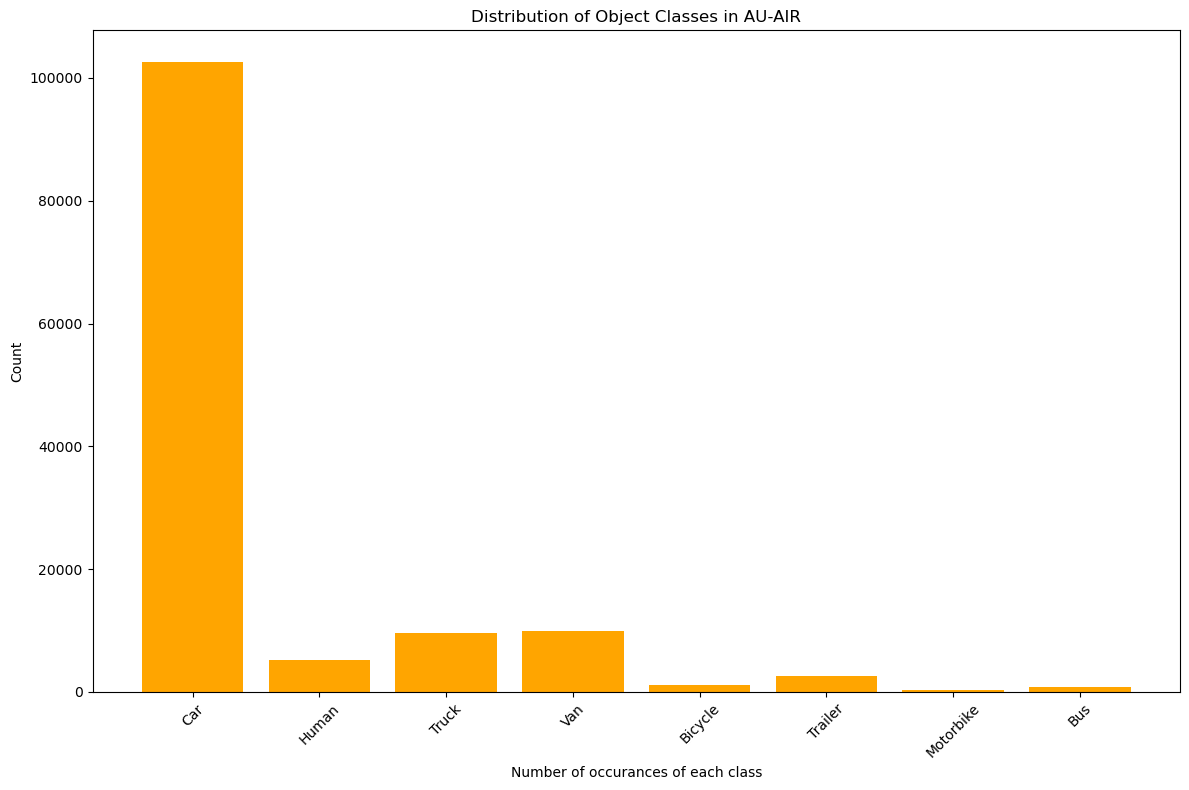

In [5]:
from collections import Counter
import matplotlib.pyplot as plt

class_ids = []
for item in data['annotations']:
    for bbox in item['bbox']:
        class_ids.append(bbox['class'])

category_counts = Counter(class_ids)
labels = [category_id_to_name[k] for k in category_counts.keys()]
counts = list(category_counts.values())

plt.figure(figsize=(12, 8))
plt.bar(labels, counts, color='orange')
plt.title("Distribution of Object Classes in AU-AIR")
plt.xlabel("Number of occurances of each class")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Bounding box size distribution

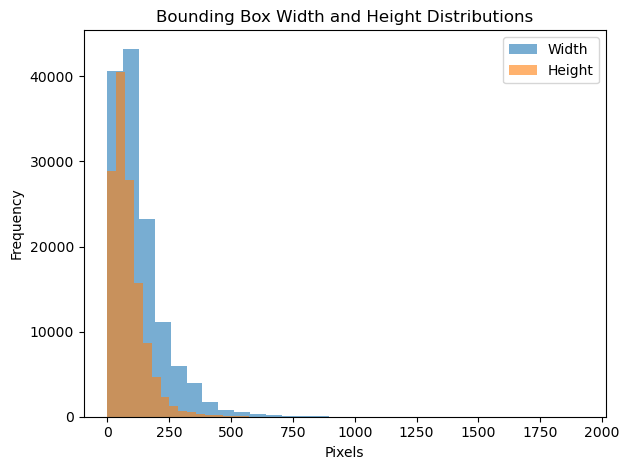

In [6]:
widths = []
heights = []

for item in data['annotations']:
    for bbox in item['bbox']:
        widths.append(bbox['width'])
        heights.append(bbox['height'])

plt.hist(widths, bins=30, alpha=0.6, label='Width')
plt.hist(heights, bins=30, alpha=0.6, label='Height')
plt.legend()
plt.title("Bounding Box Width and Height Distributions")
plt.xlabel("Pixels")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


### peeking one random sample image with bboxes

In [7]:
import os
from PIL import Image, ImageDraw
import random

image_dir = 'auair2019/images'
image_info = random.choice(data['annotations'])

img_path = os.path.join(image_dir, image_info['image_name'])

if os.path.exists(img_path):
    img = Image.open(img_path).convert("RGB")
    draw = ImageDraw.Draw(img)

    for bbox in image_info['bbox']:
        left = bbox['left']
        top = bbox['top']
        width = bbox['width']
        height = bbox['height']
        cls = bbox['class']
        label = category_id_to_name[cls]

        draw.rectangle([left, top, left + width, top + height], outline="red", width=2)
        draw.text((left, top), label, fill="yellow")

    img.show()
else:
    print(f"Image {img_path} not found!")


### Annotations per image
 how crowded each image is

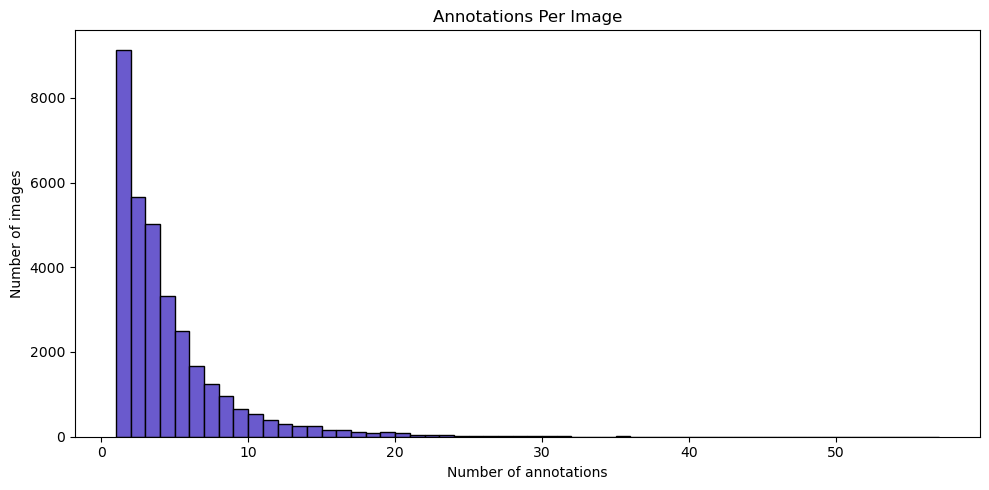

Average annotations per image: 4.02
Max annotations in a single image: 56


In [8]:
import matplotlib.pyplot as plt

ann_counts = [len(item['bbox']) for item in data['annotations']]

plt.figure(figsize=(10, 5))
plt.hist(ann_counts, bins=range(1, max(ann_counts)+2), color='slateblue', edgecolor='black')
plt.title("Annotations Per Image")
plt.xlabel("Number of annotations")
plt.ylabel("Number of images")
plt.tight_layout()
plt.show()

print(f"Average annotations per image: {sum(ann_counts) / len(ann_counts):.2f}")
print(f"Max annotations in a single image: {max(ann_counts)}")

### Category-Wise BBox Sizes
how bbox width and height vary per class

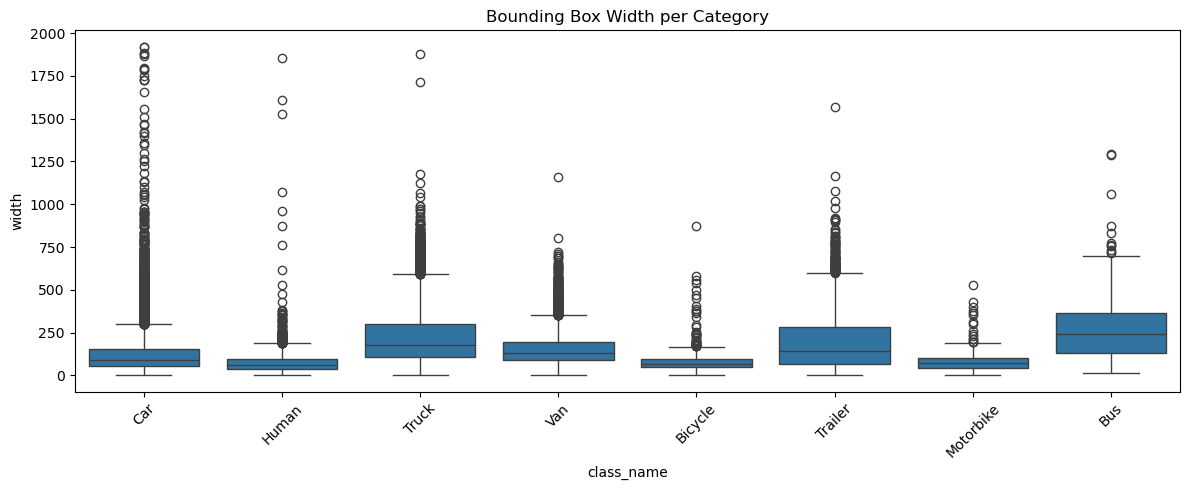

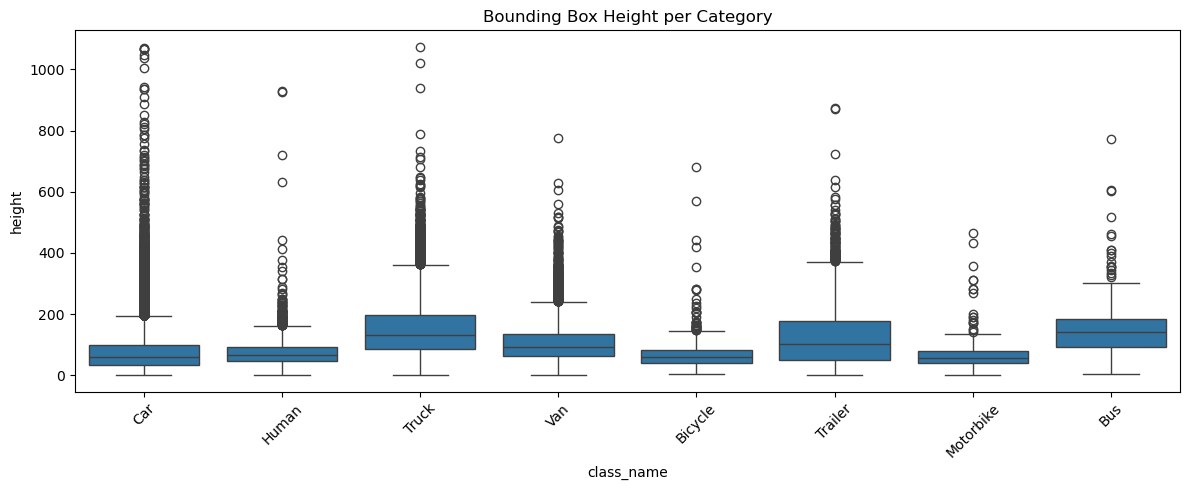

In [13]:
import pandas as pd
import seaborn as sns

# Flatten all bbox entries into a DataFrame
bbox_data = []

for item in data['annotations']:
    for bbox in item['bbox']:
        bbox_data.append({
            'class_id': bbox['class'],
            'class_name': category_id_to_name[bbox['class']],
            'width': bbox['width'],
            'height': bbox['height'],
            'aspect_ratio': bbox['width'] / bbox['height'] if bbox['height'] != 0 else 0
        })

df_bboxes = pd.DataFrame(bbox_data)

# Boxplot of bbox widths by category
plt.figure(figsize=(12, 5))
sns.boxplot(data=df_bboxes, x='class_name', y='width')
plt.xticks(rotation=45)
plt.title("Bounding Box Width per Category")
plt.tight_layout()
plt.show()

# Boxplot of bbox heights by category
plt.figure(figsize=(12, 5))
sns.boxplot(data=df_bboxes, x='class_name', y='height')
plt.xticks(rotation=45)
plt.title("Bounding Box Height per Category")
plt.tight_layout()
plt.show()


since there are some extreme values, next, i check anomalies

### Missing or Anomalous Data Check
missing image files, bboxes with width/heigth=0\
unknown class indices and duplicated entries

In [11]:
# 1. Missing image files
missing_images = []
image_dir = 'auair2019/images'

for item in data['annotations']:
    img_path = os.path.join(image_dir, item['image_name'])
    if not os.path.exists(img_path):
        missing_images.append(item['image_name'])

print(f"Missing images: {len(missing_images)}")
if missing_images:
    print("Examples:", missing_images[:5])

# 2. BBoxes with zero or negative width/height
zero_size_boxes = [
    bbox for item in data['annotations'] for bbox in item['bbox']
    if bbox['width'] <= 0 or bbox['height'] <= 0
]
print(f"Zero/negative-sized bounding boxes: {len(zero_size_boxes)}")

# 3. Invalid class indices
invalid_classes = [
    bbox['class'] for item in data['annotations'] for bbox in item['bbox']
    if bbox['class'] not in category_id_to_name
]
print(f"Invalid class indices: {len(invalid_classes)}")
if invalid_classes:
    print("Examples:", set(invalid_classes))

# 4. Duplicate image names (shouldn't happen, but worth checking)
image_names = [item['image_name'] for item in data['annotations']]
duplicates = [name for name in set(image_names) if image_names.count(name) > 1]
print(f"Duplicate image entries: {len(duplicates)}")
if duplicates:
    print("Examples:", duplicates[:5])


Missing images: 0
Zero/negative-sized bounding boxes: 54
Invalid class indices: 0
Duplicate image entries: 0


whether we have anomalies and outliers (very small number tho "54"), i decided not to filter them out for a fair comparison at the end.

### Summary Statistics & Aspect Ratio Plot

📊 EDA SUMMARY
Total number of images: 32823
Total number of annotations: 132031
Number of unique categories: 8
Average bounding box width: 127.50 px
Average bounding box height: 84.98 px
Average aspect ratio (w/h): 1.62


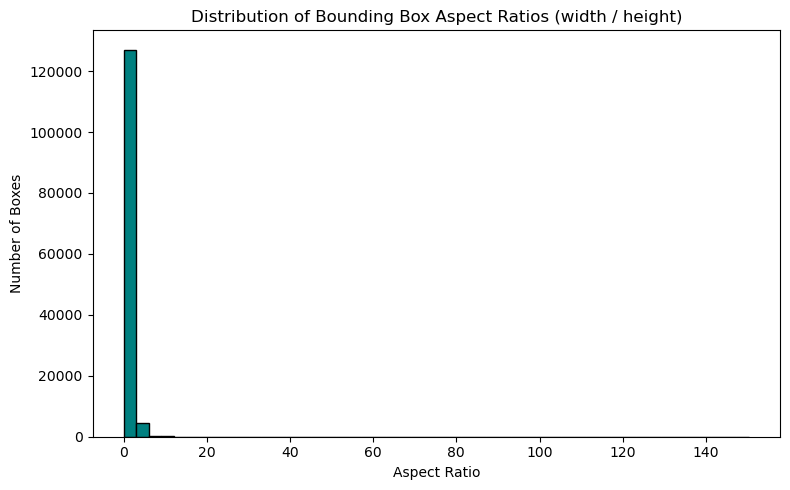

In [12]:
import numpy as np

# Total number of images (1 entry per image in data['annotations'])
total_images = len(data['annotations'])

# Total number of annotations
total_annotations = sum(len(item['bbox']) for item in data['annotations'])

# Total number of unique categories
total_categories = len(data['categories'])

# Average bbox width and height
avg_width = df_bboxes['width'].mean()
avg_height = df_bboxes['height'].mean()

# Aspect ratio distribution (already in df_bboxes)
aspect_ratios = df_bboxes['aspect_ratio']

# Print summary
print("📊 EDA SUMMARY")
print(f"Total number of images: {total_images}")
print(f"Total number of annotations: {total_annotations}")
print(f"Number of unique categories: {total_categories}")
print(f"Average bounding box width: {avg_width:.2f} px")
print(f"Average bounding box height: {avg_height:.2f} px")
print(f"Average aspect ratio (w/h): {aspect_ratios.mean():.2f}")

# Plot aspect ratio distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(aspect_ratios, bins=50, color='teal', edgecolor='black')
plt.title("Distribution of Bounding Box Aspect Ratios (width / height)")
plt.xlabel("Aspect Ratio")
plt.ylabel("Number of Boxes")
plt.tight_layout()
plt.show()


### ???

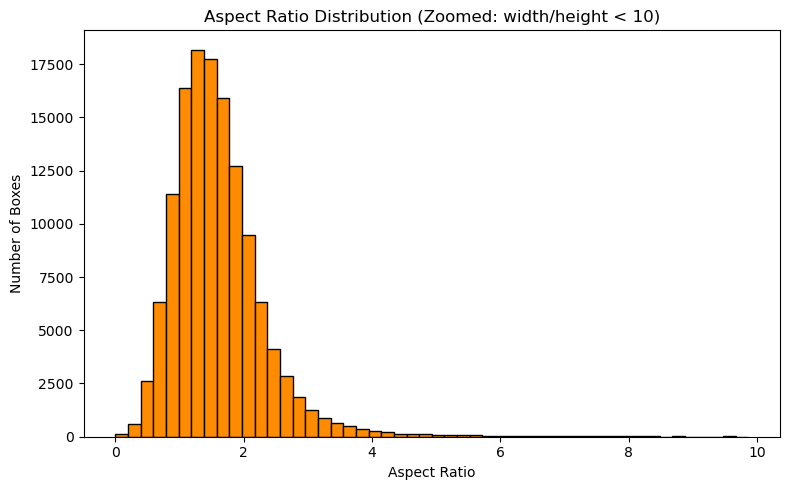

In [ ]:
# ZOOM IN on most common aspect ratios
plt.figure(figsize=(8, 5))
plt.hist(aspect_ratios[aspect_ratios < 10], bins=50, color='darkorange', edgecolor='black')
plt.title("Aspect Ratio Distribution (Zoomed: width/height < 10)")
plt.xlabel("Aspect Ratio")
plt.ylabel("Number of Boxes")
plt.tight_layout()
plt.show()


# Preprocessing
since we have seen DETR in our lecture, i decided to work with a DETR model, so i need to first convert AU aIR dataset (annotations) into COCO dataset\
most of the object detection transforemers also uses COCO format\
the coco style json is:
* "images": list of dicts with id, file_name, width, height

* "annotations": list of dicts with id, image_id, category_id, bbox, area, iscrowd

* "categories": list of dicts with id, name

so we need to loop over our annotations, add images and annotations lists for each image.


### COCO conversion code

In [16]:
# Filepaths
image_dir = 'auair2019/images'
output_coco_json = 'auair2019/annotations_coco.json'

# Initialize COCO-style structure
coco_output = {
    "images": [],
    "annotations": [],
    "categories": []
}

# Categories
category_id_to_name = {i: name for i, name in enumerate(data['categories'])}
coco_output["categories"] = [
    {"id": i, "name": name, "supercategory": "object"}
    for i, name in category_id_to_name.items()
]

# Fill image and annotation entries
ann_id = 1
for image_id, item in enumerate(data['annotations'], start=1):
    file_name = item['image_name']
    width = int(item.get('image_width:', 1920))  # Fallback
    height = int(item.get('image_height', 1080))

    # Add image info
    coco_output['images'].append({
        "id": image_id,
        "file_name": file_name,
        "width": width,
        "height": height
    })

    # Add all bounding boxes
    for box in item['bbox']:
        x = box['left']
        y = box['top']
        w = box['width']
        h = box['height']
        cls = box['class']

        coco_output['annotations'].append({
            "id": ann_id,
            "image_id": image_id,
            "category_id": cls,
            "bbox": [x, y, w, h],
            "area": w * h,
            "iscrowd": 0
        })

        ann_id += 1

# Save JSON
with open(output_coco_json, 'w') as f:
    json.dump(coco_output, f)

print(f"COCO-style annotations saved to {output_coco_json}")

COCO-style annotations saved to auair2019/annotations_coco.json


so now we have coco json file which is ready to use in torchvision and transformers. \
to split the data, i used the percentages they used in AU AIR paper, which is 

60% training

10% validation

30% testing

In [17]:
import random
import shutil
from copy import deepcopy

# Reuse the coco_output structure
images = coco_output['images']
annotations = coco_output['annotations']
categories = coco_output['categories']

# Shuffle reproducibly
random.seed(42)
random.shuffle(images)

# Split
n = len(images)
train_images = images[:int(0.6 * n)]
val_images   = images[int(0.6 * n):int(0.7 * n)]
test_images  = images[int(0.7 * n):]

# Helper to extract annotations linked to specific image ids
def filter_annotations(images_subset):
    img_ids = {img['id'] for img in images_subset}
    return [ann for ann in annotations if ann['image_id'] in img_ids]

# Create subsets
splits = {
    'train': {
        'images': train_images,
        'annotations': filter_annotations(train_images),
        'categories': categories
    },
    'val': {
        'images': val_images,
        'annotations': filter_annotations(val_images),
        'categories': categories
    },
    'test': {
        'images': test_images,
        'annotations': filter_annotations(test_images),
        'categories': categories
    }
}

# Save to files
output_dir = 'auair2019/splits'
os.makedirs(output_dir, exist_ok=True)

for split, content in splits.items():
    out_path = os.path.join(output_dir, f'instances_{split}.json')
    with open(out_path, 'w') as f:
        json.dump(content, f)
    print(f"Saved {split} split to {out_path} with {len(content['images'])} images.")


Saved train split to auair2019/splits\instances_train.json with 19693 images.
Saved val split to auair2019/splits\instances_val.json with 3283 images.
Saved test split to auair2019/splits\instances_test.json with 9847 images.


🫡